#  ПРИКЛАД ВИКОНАННЯ ЛАБОРАТОРНОЇ РОБОТИ № 2
#  1. АМПЛІТУДНІ ПЕРЕТВОРЕННЯ. НЕГАТИВНЕ ЗОБРАЖЕННЯ. КЕРУВАННЯ ЯСКРАВІСТЮБ КОНТРАСТОМ

In [28]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
plt.rcParams['font.size'] = 18

In [29]:
# Завантаження файлу зображення
## filename = 'd:/_Doc_Vol_My_/_GIT_/2020/2020_Digita_Image_Processing/Test_Images/io_test_01.jpg'
filename = 'd:/_Doc_Vol_My_/_GIT_/2020/2020_Digita_Image_Processing/Test_Images/Lab_01_Test_001.jpg' 
test_im = io.imread(filename)
## Визначення стркутури та розміру зображення
print ('IMAGE SHAPE', test_im.shape, 'IMAGE SIZE', test_im.size)
rows_num = test_im.shape[0] ## кількість рядків
clms_num = test_im.shape[1] ## кількість колонок
pix_num = rows_num*clms_num ## кількість пікселів
bins = 256 ## кількість рівнів яскравості
print ('ROWS NUMBER', rows_num, 'CLMS NUMBER', clms_num, 'PIX NUMBER', pix_num, 'Bins',bins)

IMAGE SHAPE (447, 605, 3) IMAGE SIZE 811305
ROWS NUMBER 447 CLMS NUMBER 605 PIX NUMBER 270435 Bins 256


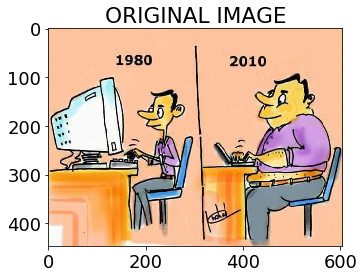

In [30]:
## Вивід оррігінального зображення на екран
plt.title('ORIGINAL IMAGE')
plt.imshow(test_im)
plt.show()

Gray_Im SAPE (447, 605, 3) Gray_Im SIZE 270435


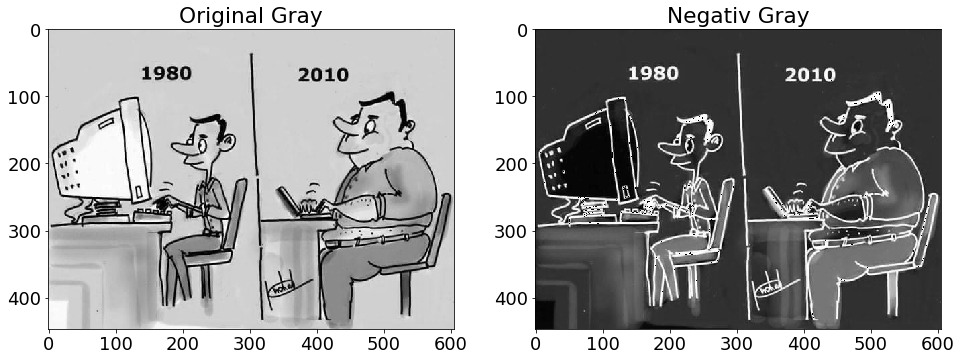

In [31]:
## Визначення масиву НАПІВТТОНОВОГО зображення
gray_im = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint8)
## Визначення масиву НЕГАТИВНОГО НАПІВТТОНОВОГО зображення
gray_im_neg = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint8)
print ('Gray_Im SAPE', gray_im.shape, 'Gray_Im SIZE', rows_num * clms_num)

for i in  range (rows_num):
    for j in  range (clms_num):
        # Gray image
        gray_im [i, j, :] = 0.299*test_im [i, j, 0]+0.587*test_im [i, j, 1]+0.114*test_im [ i, j, 2]
        gray_im_neg [i, j, :] = 256 - gray_im [i, j, 0]       
        
## СУМІСНИЙ ВИВІД НАПІВТОНОВАНОГО та НЕГАТИВНОГО НАПІВТОНОВАНОГО зображення
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(gray_im)
ax[0].set_title("Original Gray")
ax[1].imshow(gray_im_neg)
ax[1].set_title("Negativ Gray")
plt.show()

Luminance MIN =  0 Luminance MAX =  255 Luminance Bias =  50


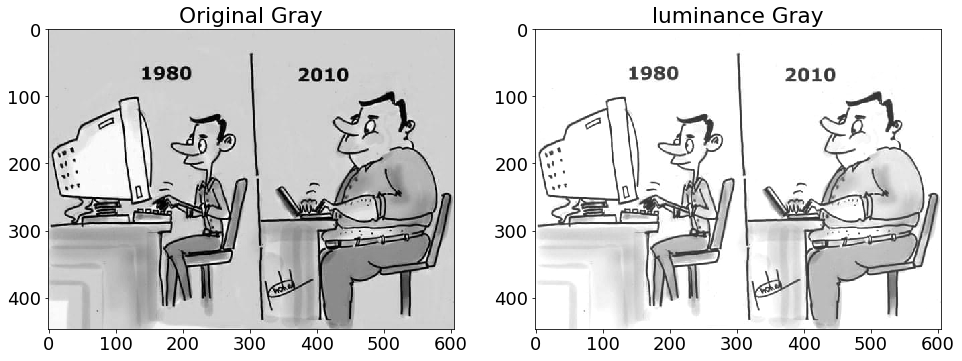

In [32]:
## КЕРУВАННЯ ЯСКРАВІСТЮ
L_min =  np.amin(gray_im) ##  Визначення мінімальної яскравості
L_max =  np.amax(gray_im) ##  Визначення макимальної  яскравості
L_bias = 50  ## Зміщення яскравості
print ('Luminance MIN = ', L_min, 'Luminance MAX = ',L_max, 'Luminance Bias = ',L_bias)

## Визначення масиву зображення з підвищеною яскравістю
gray_im_L = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint8)

## Пертворення яскравісті
for i in  range (rows_num):
    for j in  range (clms_num):
        L = gray_im [i, j, 0] + L_bias
        if L < 0:
            gray_im_L [i, j, :] = 0
        elif L>bins-1:
            gray_im_L [i, j, :] = bins-1
        else :    
            gray_im_L [i, j, :] = L
            
## СУМІСНИЙ ВИВІД НАПІВТОНОВАНОГО та зображення ПІДВИЩЕНОЇ ЯСКРАВОСТІ
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(gray_im)
ax[0].set_title("Original Gray")
ax[1].imshow(gray_im_L)
ax[1].set_title("luminance Gray")
plt.show()

Luminance MIN =  50 Luminance MAX =  200 K =  1.7066666666666668


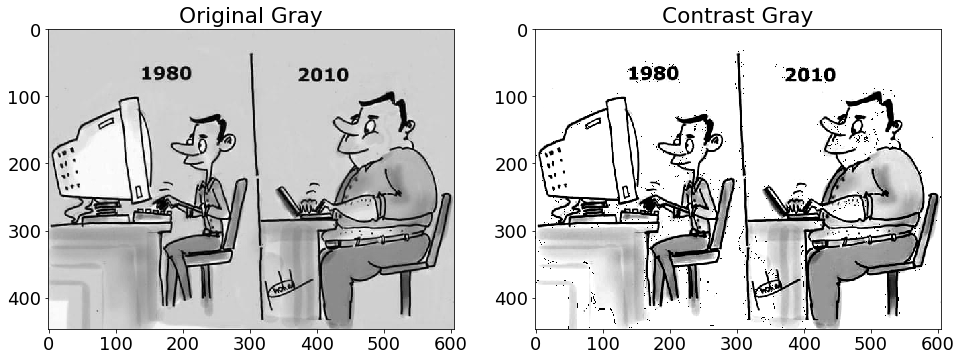

In [33]:
## КЕРУВАННЯ КОНТРАСТОМ
## Визначення масиву зображення з півищеним контрастом
gray_im_С = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint8)

## Параметри керування контрастом
L_low  = 50
L_top  = 200
K = bins/(L_top-L_low)
print ('Luminance MIN = ', L_low, 'Luminance MAX = ',L_top, 'K = ', K)
        
for i in  range (rows_num):
    for j in  range (clms_num):
        if gray_im [i, j, 0] < L_low : 
            gray_im_С [i, j, :] = 0
        elif gray_im [i, j, 0] > L_top :
            gray_im_С [i, j, :] = bins-1
        else :    
            gray_im_С [i, j, :] = (gray_im [i, j, 0] - L_low)*K
            
## СУМІСНИЙ ВИВІД НАПІВТОНОВАНОГО та зображення ПІДВИЩЕНОЇ КОНТРАСТНОСТІ
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(gray_im)
ax[0].set_title("Original Gray")
ax[1].imshow(gray_im_С)
ax[1].set_title("Contrast Gray")
plt.show()  
